In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
%matplotlib inline
from sklearn.metrics import confusion_matrix, accuracy_score


In [2]:
data = pd.read_csv('diabetes.csv', sep=',', header =0)
print(len(data))
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
data.head()


768


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


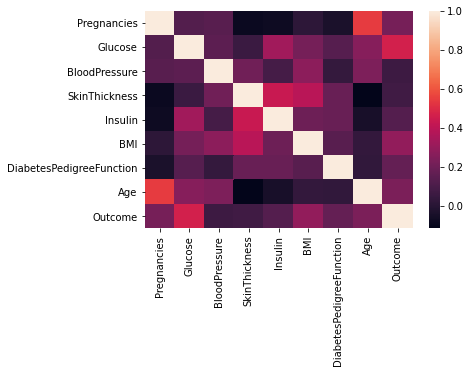

In [4]:
sns.heatmap(data.corr())

In [5]:
data_arr =np.asarray(data)
print(data_arr.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

(768, 9)


In [6]:
classifier = svm.SVC(kernel='linear', C = 1.0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [7]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.8181818181818182


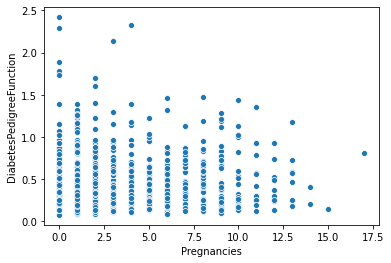

In [8]:
sns.scatterplot(x=data['Pregnancies'], y=data['DiabetesPedigreeFunction'])

In [9]:
svc_clf_pred_train = cross_val_predict(classifier, X_train, y_train, cv = 3)
print('precision_score : ',precision_score(y_train, svc_clf_pred_train ))
print('recall_score : ',recall_score(y_train, svc_clf_pred_train))
print('f1_score ',f1_score(y_test, y_pred))

precision_score :  0.7251461988304093
recall_score :  0.5610859728506787
f1_score  0.6744186046511628


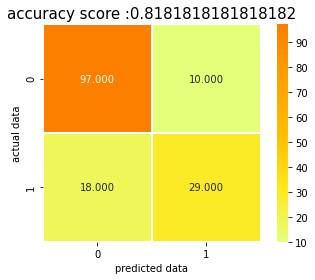

In [10]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, fmt='.3f', linewidth=.5, square= True, cmap="Wistia")
plt.ylabel('actual data');
plt.xlabel('predicted data');
all_sample_title= "accuracy score :{0}".format(accuracy)
plt.title(all_sample_title, size=15);